## IMPORT NECESSARY LIBRARIES

In [112]:
import os
import cv2
from imutils import paths
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.preprocessing import Normalizer
import warnings
warnings.filterwarnings('ignore')




In [113]:
datapath =r"C:\Users\dell\Downloads\New pics\New pics"

## READ DATA

In [114]:
pathToImage =list(paths.list_images(datapath))
#print(pathToImage)
data =[]
labels =[]
for images in pathToImage:
    label=images.split(os.path.sep)[-2]
    #print(label)
    image =cv2.imread(images)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    data.append(image)
    labels.append(label)
    #plt.figure()


In [115]:
#print(labels)

In [116]:
# Total number of images and labels
print('Total number of images',len(data))
print('Total number of labels',len(set(labels)))
print("Labels: ",[X for X in set(labels)])

Total number of images 600
Total number of labels 3
Labels:  ['C', 'A', 'B']


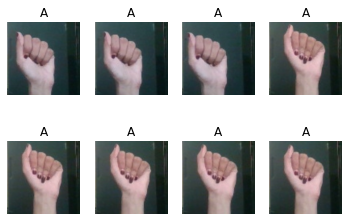

In [117]:
#plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(data[i])
    plt.title(labels[i])
    plt.axis('off')

In [118]:
blur_img =[]
clear_image =[]
for img in data:
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    Gaussain_blur =cv2.GaussianBlur(gray,(5,5),2) 
    th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
    ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((3, 3), np.uint8)
    closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
    #dilation = cv2.erode(closing, kernel, iterations=1)
    clear_image.append(closing)       
    blur_img.append(Gaussain_blur)
    

In [119]:
print(ret)

0.0


In [120]:
print(res)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


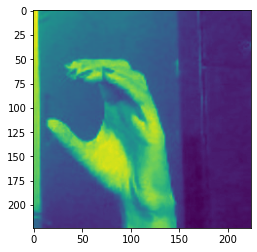

In [121]:
plt.imshow(gray)

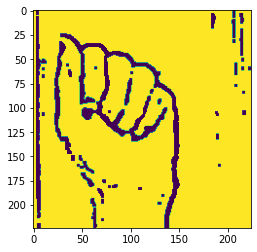

In [122]:
plt.imshow(clear_image[1])

In [123]:
clear_image[1]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

## Gaussian blur image

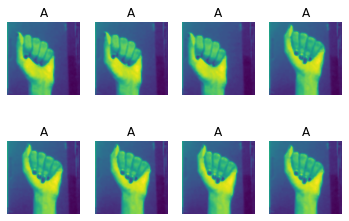

In [124]:
#plt.figure(figsize =(20,20))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blur_img[i])
    plt.title(labels[i])
    plt.axis('off')
    
    
    

## clear image

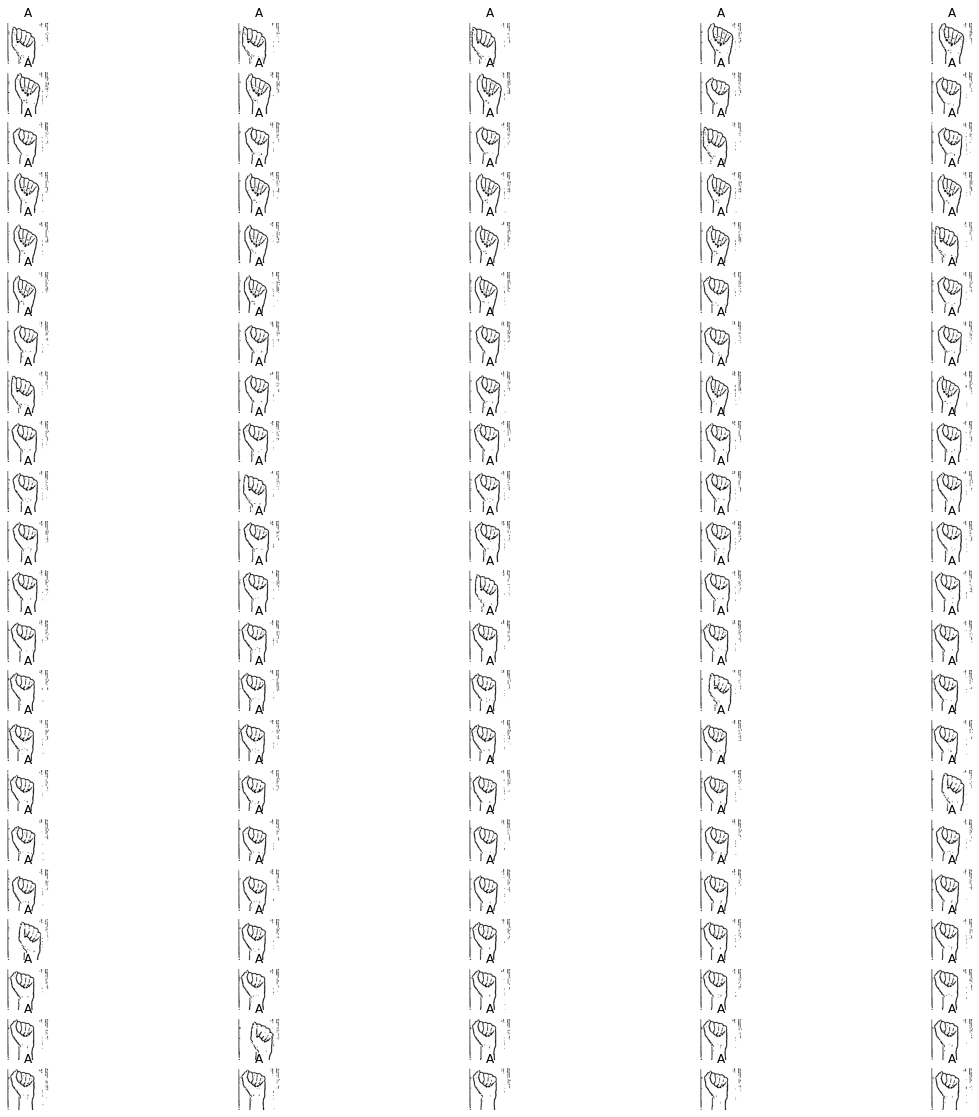

In [125]:
plt.figure(figsize =(20,20))
for i in range(110):
    plt.subplot(22, 5, i + 1)
    plt.imshow(clear_image[i],cmap ="gray")
    plt.title(labels[i])
    plt.axis('off')

In [126]:
data =np.array(clear_image)
labels =np.array(labels)


## SPLITTING DATA 

In [127]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,test_size =0.2,stratify =labels,random_state =42)

## SHAPE OF TRAINING AND TESTING DATA

In [128]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(480, 224, 224)
(480,)
(120, 224, 224)
(120,)


## NORMALIZING THE DATA

In [129]:
#x_train =Normalizer().fit_transform(x_train)
#x_test =Normalizer().fit_transform(x_test)

In [130]:
x_train =x_train/255
x_test = x_test/255

In [131]:
print(x_train)

[[[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 ...

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]

 [[1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  ...
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 1. 1. 1.]]]


In [132]:
print(y_train)

['C' 'A' 'C' 'C' 'A' 'A' 'B' 'C' 'A' 'C' 'C' 'A' 'C' 'B' 'A' 'C' 'A' 'A'
 'B' 'C' 'C' 'C' 'C' 'C' 'B' 'C' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'C' 'A' 'A'
 'B' 'C' 'B' 'C' 'C' 'A' 'B' 'B' 'C' 'A' 'B' 'C' 'B' 'B' 'C' 'C' 'B' 'A'
 'A' 'C' 'A' 'A' 'B' 'C' 'C' 'C' 'B' 'B' 'C' 'C' 'C' 'A' 'A' 'A' 'B' 'B'
 'A' 'B' 'A' 'C' 'C' 'A' 'B' 'C' 'A' 'A' 'B' 'A' 'B' 'B' 'B' 'B' 'A' 'A'
 'A' 'B' 'A' 'C' 'C' 'A' 'A' 'B' 'C' 'A' 'B' 'C' 'B' 'B' 'C' 'A' 'A' 'A'
 'B' 'A' 'C' 'B' 'C' 'C' 'C' 'A' 'B' 'C' 'C' 'B' 'A' 'A' 'A' 'A' 'B' 'C'
 'B' 'C' 'B' 'B' 'C' 'C' 'C' 'C' 'B' 'B' 'C' 'B' 'B' 'C' 'C' 'B' 'B' 'B'
 'C' 'C' 'A' 'C' 'C' 'C' 'B' 'B' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'C'
 'B' 'A' 'C' 'A' 'A' 'A' 'A' 'B' 'B' 'A' 'A' 'B' 'C' 'A' 'B' 'A' 'C' 'B'
 'B' 'C' 'B' 'B' 'C' 'C' 'C' 'C' 'A' 'C' 'A' 'B' 'A' 'C' 'A' 'C' 'B' 'A'
 'A' 'B' 'C' 'C' 'B' 'C' 'B' 'A' 'C' 'A' 'A' 'B' 'B' 'C' 'A' 'A' 'A' 'B'
 'B' 'C' 'C' 'A' 'A' 'B' 'B' 'B' 'C' 'C' 'C' 'B' 'B' 'A' 'C' 'B' 'B' 'C'
 'A' 'B' 'B' 'A' 'B' 'B' 'B' 'A' 'C' 'A' 'A' 'A' 'C

In [133]:
#x_train = x_train.reshape(120, 224*224*3)
#x_test = x_test.reshape(30,224*224*3 )

In [134]:
x_train = x_train.reshape(480,224,224,1)
x_test =x_test.reshape(120,224,224,1)

In [135]:
x_test.shape

(120, 224, 224, 1)

In [136]:
x_train.ndim

4

In [137]:
y_train

array(['C', 'A', 'C', 'C', 'A', 'A', 'B', 'C', 'A', 'C', 'C', 'A', 'C',
       'B', 'A', 'C', 'A', 'A', 'B', 'C', 'C', 'C', 'C', 'C', 'B', 'C',
       'A', 'B', 'A', 'B', 'A', 'A', 'B', 'C', 'A', 'A', 'B', 'C', 'B',
       'C', 'C', 'A', 'B', 'B', 'C', 'A', 'B', 'C', 'B', 'B', 'C', 'C',
       'B', 'A', 'A', 'C', 'A', 'A', 'B', 'C', 'C', 'C', 'B', 'B', 'C',
       'C', 'C', 'A', 'A', 'A', 'B', 'B', 'A', 'B', 'A', 'C', 'C', 'A',
       'B', 'C', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A',
       'B', 'A', 'C', 'C', 'A', 'A', 'B', 'C', 'A', 'B', 'C', 'B', 'B',
       'C', 'A', 'A', 'A', 'B', 'A', 'C', 'B', 'C', 'C', 'C', 'A', 'B',
       'C', 'C', 'B', 'A', 'A', 'A', 'A', 'B', 'C', 'B', 'C', 'B', 'B',
       'C', 'C', 'C', 'C', 'B', 'B', 'C', 'B', 'B', 'C', 'C', 'B', 'B',
       'B', 'C', 'C', 'A', 'C', 'C', 'C', 'B', 'B', 'A', 'A', 'A', 'A',
       'A', 'A', 'B', 'B', 'A', 'C', 'B', 'A', 'C', 'A', 'A', 'A', 'A',
       'B', 'B', 'A', 'A', 'B', 'C', 'A', 'B', 'A', 'C', 'B', 'B

In [138]:
#x_train.reshape()

In [139]:
#x_train =Normalizer().fit_transform(x_train)
#x_test =Normalizer().fit_transform(x_test)

In [140]:
x_train[0].max()

1.0

In [141]:
lb = preprocessing.LabelBinarizer()
y_train =lb.fit_transform(y_train)
y_test =lb.fit_transform(y_test)

In [142]:
x_test.shape,y_test.shape

((120, 224, 224, 1), (120, 3))

## DATA GENERATOR

In [143]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(x_train)

## CNN MODEL

In [144]:
#CNN
# 1st sequential for forward and backoard propogation
model = models.Sequential()
#adding convolution layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1),padding ='same'))
#max pooling
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
# Drop_out
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding ='same'))
model.add(layers.MaxPooling2D((2, 2)))


In [145]:
# now flatten 
model.add(layers.Flatten())
# fully connected neural network
model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

In [146]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 56, 56, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 64)       

In [147]:
x_train.shape,y_train.shape

((480, 224, 224, 1), (480, 3))

In [148]:
x_test.shape,y_test.shape

((120, 224, 224, 1), (120, 3))

In [149]:
y_train

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]])

In [150]:
# early stopping
import tensorflow as tf
early_stopping =tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [151]:
# compile and train model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train), epochs = 20, validation_data=(x_test,y_test),callbacks =early_stopping)

Epoch 1/20
15/15 [==============================] - 33s 2s/step - loss: 1.6868 - accuracy: 0.3417 - val_loss: 1.0992 - val_accuracy: 0.3333
Epoch 2/20
15/15 [==============================] - 32s 2s/step - loss: 1.0998 - accuracy: 0.3000 - val_loss: 1.0991 - val_accuracy: 0.3333
Epoch 3/20
15/15 [==============================] - 30s 2s/step - loss: 1.0988 - accuracy: 0.3354 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 4/20
15/15 [==============================] - 31s 2s/step - loss: 1.0988 - accuracy: 0.3229 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 5/20
15/15 [==============================] - 28s 2s/step - loss: 1.0987 - accuracy: 0.3313 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 6/20
15/15 [==============================] - 28s 2s/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 7/20
15/15 [==============================] - 28s 2s/step - loss: 1.0993 - accuracy: 0.3250 - val_loss: 1.0987 - val_accuracy: 0.3333
Epoch 8/20
15/15 [==

## PLOTTING 

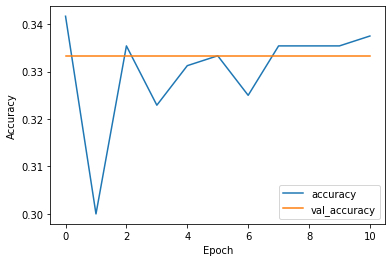

In [152]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(validation_ds, verbose=2)

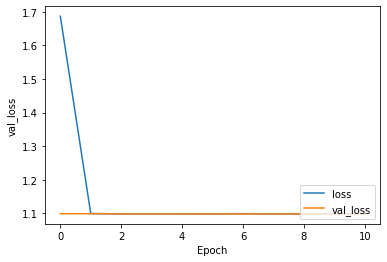

In [153]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('val_loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [154]:
x_test.shape

(120, 224, 224, 1)

In [155]:
y_test.shape

(120, 3)

In [156]:
score = model.evaluate(x_test, y_test,batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 2s 397ms/step - loss: 1.0986 - accuracy: 0.3333
Test loss: 1.0986132621765137
Test accuracy: 0.3333333432674408


In [157]:
y_predict=model.predict(x_test)
print(y_predict)
y_result  =np.argmax(y_predict,axis =1)
print(y_result)
y_test=np.argmax(y_test,axis =1)

4/4 [==============================] - 2s 381ms/step
[[0.330998   0.33485824 0.33414376]
 [0.33101976 0.33484018 0.33414003]
 [0.33099762 0.33487856 0.33412385]
 [0.330991   0.33489597 0.33411303]
 [0.33101332 0.3348704  0.33411628]
 [0.3310084  0.334863   0.3341286 ]
 [0.33099863 0.33487675 0.33412465]
 [0.33098835 0.33488634 0.3341253 ]
 [0.33097282 0.3348993  0.3341279 ]
 [0.3310121  0.33482248 0.33416548]
 [0.33099514 0.3348525  0.33415234]
 [0.33100244 0.334871   0.33412656]
 [0.3310027  0.33489996 0.3340973 ]
 [0.33100966 0.3348329  0.3341574 ]
 [0.3310183  0.33483544 0.3341463 ]
 [0.33100912 0.3348401  0.33415085]
 [0.33099332 0.33487922 0.33412743]
 [0.3310057  0.33487806 0.3341163 ]
 [0.33099377 0.33488658 0.33411968]
 [0.3310074  0.33487248 0.33412015]
 [0.33102408 0.33484986 0.33412603]
 [0.33100116 0.334876   0.33412284]
 [0.33098808 0.33489355 0.33411837]
 [0.33100143 0.33487472 0.33412382]
 [0.33098495 0.33489603 0.33411905]
 [0.3309608  0.33491915 0.33412006]
 [0.3309776

In [158]:
print(y_result)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1]


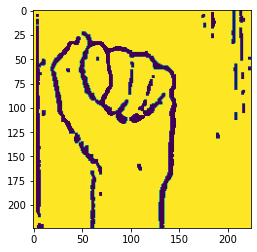

In [159]:
plt.imshow(x_test[0])

## PLOTTING CONFUSION MATRIX

accuracy_score 0.3333333333333333

confusion_matrix               precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.33      1.00      0.50        40
           2       0.00      0.00      0.00        40

    accuracy                           0.33       120
   macro avg       0.11      0.33      0.17       120
weighted avg       0.11      0.33      0.17       120



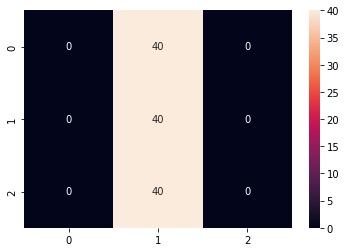

In [160]:
from sklearn.metrics import classification_report as cr,accuracy_score,confusion_matrix
cm =confusion_matrix(y_test,y_result)
sns.heatmap(cm,annot =True)
print("accuracy_score",accuracy_score(y_test,y_result))
print()
print('confusion_matrix',cr(y_test,y_result))

In [161]:
y_test

array([0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 1, 0, 1,
       2, 1, 2, 2, 2, 0, 2, 2, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2,
       0, 2, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 2,
       0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0,
       0, 1, 0, 1, 0, 2, 0, 2, 2, 2], dtype=int64)

# PREDICTION

(1, 224, 224, 1)


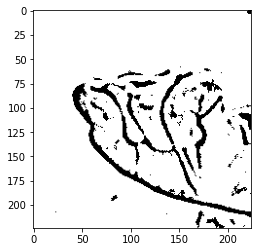

In [162]:
image =cv2.imread(r'C:\Users\dell\Downloads\TEST_DATA\a-samples\4.jpg')
gray =cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
Gaussain_blur =cv2.GaussianBlur(gray,(5,5),4)
th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
test_image =closing/255
test_image = np.expand_dims(test_image,0)
test_image = test_image.reshape(1,224,224,1)


plt.imshow(res,cmap ="gray")
print(test_image.shape)

In [163]:
pred_img=model.predict(np.array(test_image))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

1/1 [==============================] - 0s 54ms/step
[[0.3309971  0.334851   0.33415192]]


array([1], dtype=int64)

(1, 224, 224, 1)


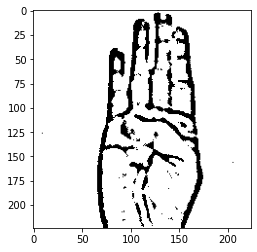

In [164]:
image_b =cv2.imread(r'C:\Users\dell\Downloads\TEST_DATA\B -samples\11.jpg')
gray =cv2.cvtColor(image_b,cv2.COLOR_BGR2GRAY)
Gaussain_blur =cv2.GaussianBlur(gray,(5,5),4)
th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
test_image =closing/255
test_image = np.expand_dims(test_image,0)
test_image = test_image.reshape(1,224,224,1)
plt.imshow(res,cmap ="gray")
print(test_image.shape)

In [165]:
pred_img=model.predict(np.array(test_image))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

1/1 [==============================] - 0s 52ms/step
[[0.3309995  0.3348712  0.33412924]]


array([1], dtype=int64)

(1, 224, 224, 1)


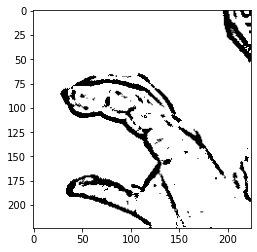

In [166]:
image_c =cv2.imread(r"C:\Users\dell\Downloads\TEST_DATA\C-samples\8.jpg")
gray =cv2.cvtColor(image_c,cv2.COLOR_BGR2GRAY)
Gaussain_blur =cv2.GaussianBlur(gray,(5,5),4)
th3=cv2.adaptiveThreshold(Gaussain_blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
ret,res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel, iterations=1)
test_image =closing/255
test_image = np.expand_dims(test_image,0)
test_image = test_image.reshape(1,224,224,1)
plt.imshow(res,cmap ="gray")
print(test_image.shape)

In [167]:
pred_img=model.predict(np.array(test_image))
print(pred_img)
pred_result  =np.argmax(pred_img,axis =1)
pred_result

1/1 [==============================] - 0s 57ms/step
[[0.33099225 0.3348488  0.334159  ]]


array([1], dtype=int64)

In [168]:
from tqdm import tqdm
a = [1,2,3]

In [169]:
for i in tqdm(a):
    print(i)

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 758.37it/s]

1
2
3
